In [1]:
#Convolutional Nural network(CNN)
#Using Keras and classes in both python and R, develop a convolutional neural network with six layers to classify the Fashion MNIST dataset

import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [6]:
# Load and preprocess the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [8]:
# Reshape images to include channel dimension (28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [9]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [12]:
# Define the CNN model
model = Sequential([
    # Layer 1: Convolutional
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    # Layer 2: Convolutional
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Layer 3: Convolutional
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Layer 4: Flatten
    Flatten(),

    # Layer 5: Dense
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Layer 6: Output
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Train the model
history = model.fit(x_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 47s 120ms/step - accuracy: 0.5743 - loss: 1.1803 - val_accuracy: 0.7966 - val_loss: 0.5382
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 78s 109ms/step - accuracy: 0.7987 - loss: 0.5539 - val_accuracy: 0.8363 - val_loss: 0.4407
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 110ms/step - accuracy: 0.8309 - loss: 0.4681 - val_accuracy: 0.8489 - val_loss: 0.4038
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 117ms/step - accuracy: 0.8476 - loss: 0.4193 - val_accuracy: 0.8554 - val_loss: 0.3841
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 80s 112ms/step - accuracy: 0.8602 - loss: 0.3841 - val_accuracy: 0.8700 - val_loss: 0.3495
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 78s 102ms/step - accuracy: 0.8671 - loss: 0.3588 - val_accuracy: 0.8748 - val_loss: 0.3359
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 103ms/step - accuracy: 0.8776 - loss: 0.3333 - val_accuracy: 0.8781 - val_loss: 0.3283
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 104ms/step - accuracy: 0.8841 - loss: 0

In [16]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8861 - loss: 0.3284

Test accuracy: 0.8836


In [23]:
# Plot training history
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

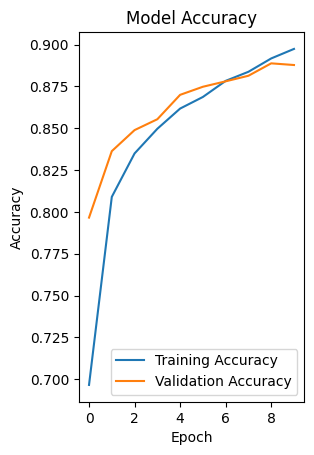

In [18]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

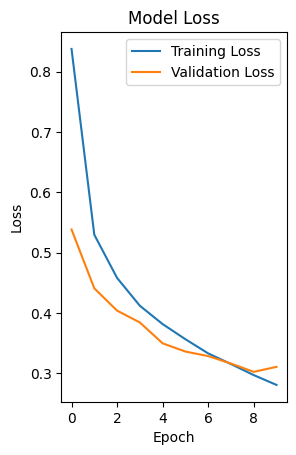

In [19]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [20]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>